# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [426]:
import pandas as pd
import matplotlib.pyplot as plt

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [427]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", nrows = 3000, na_values = "Unknown")
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [428]:
df.shape

(3000, 15)

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

#### This data on pet licensing records in New York City, details various attributes of licensed pets. 
#### Each row in the dataset is an individual pet's licensing record, containing information about the pet's characteristics, health status, and licensing details.

#### Two columns in the dataset:
#### Animal Name: This column contains the name of the pet. 
#### License Issued Date: This column indicates the date when the pet's license was officially issued. For example, "2015-09-19" means the license for that particular pet was issued on September 19, 2015.

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

#### 1. What percentage of the pets in the dataset are spayed or neutered?
#### 2. What is the most common primary breed among licensed pets?
#### 3. Which ZIP code has the highest number of licensed pets?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

Text(0, 0.5, 'Number of Dogs')

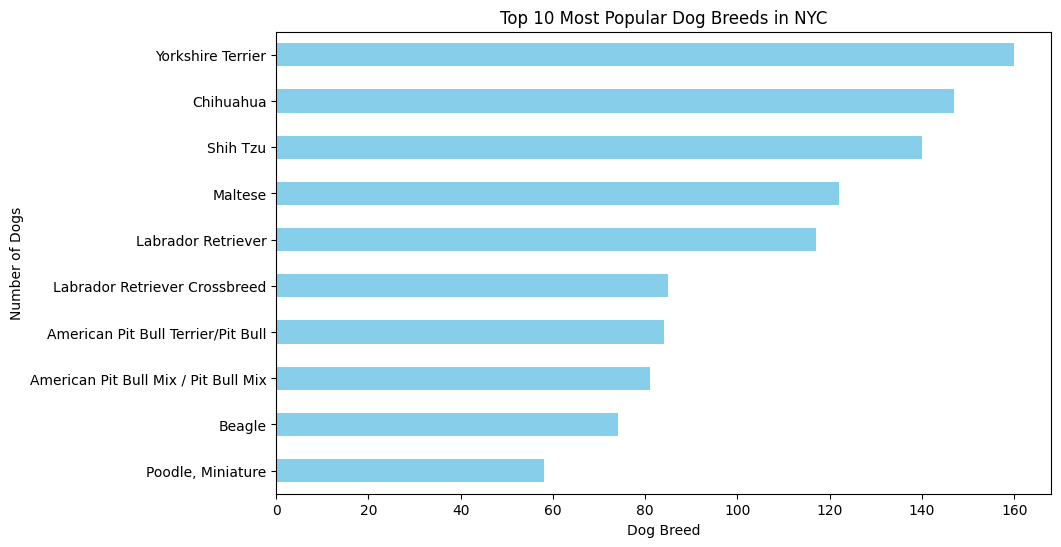

In [429]:
# Get the top 10 breeds
top10 = df["Primary Breed"].value_counts().head(10)
top10 = top10.sort_values(ascending = True)

# Plotting the top 10 breeds
plt.figure(figsize=(10, 6))
top10.plot(kind = 'barh', color='skyblue')
plt.title("Top 10 Most Popular Dog Breeds in NYC")
plt.xlabel("Dog Breed")
plt.ylabel("Number of Dogs")

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

...maybe "unknown" should just count as missing data?

Text(0, 0.5, 'Number of Dogs')

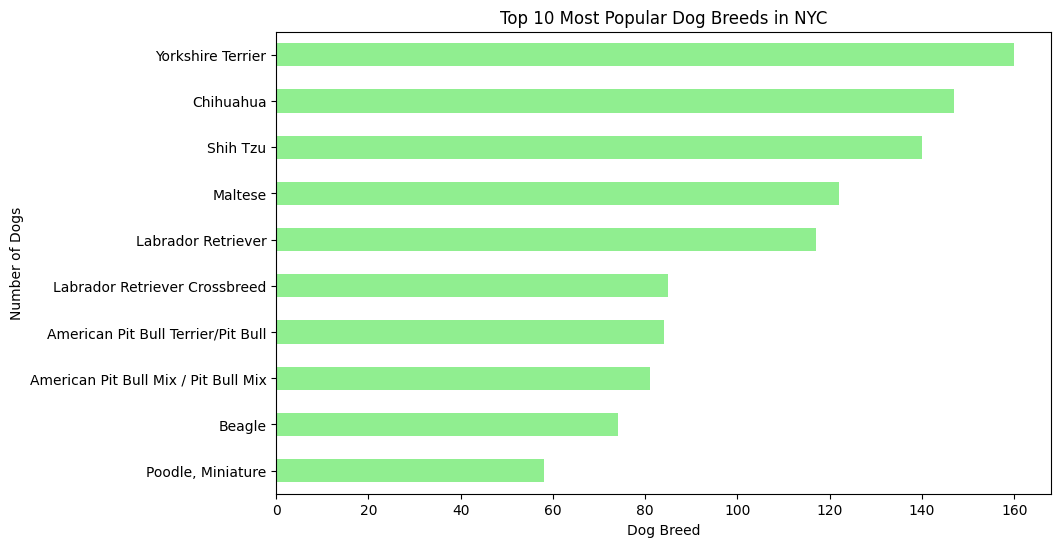

In [430]:
# top10_known = df[df["Primary Breed"] != "Unknown"]
# Removed in read_csv
top10_known = df["Primary Breed"].value_counts().head(10)
top10_known = top10_known.sort_values(ascending = True)

# Plotting the top 10 breeds
plt.figure(figsize=(10, 6))
top10_known.plot(kind = 'barh', color = 'lightgreen')
plt.title('Top 10 Most Popular Dog Breeds in NYC')
plt.xlabel('Dog Breed')
plt.ylabel('Number of Dogs')

## What are the most popular dog names?

In [431]:
# Most popular names
top_names = df["Animal Name"].value_counts().head(10)
top_names

Animal Name
Bella      25
Max        19
Charlie    19
Lola       19
Lily       15
Daisy      14
Rocky      13
Buddy      13
Coco       13
Lucy       13
Name: count, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [432]:
df["Animal Name"] = df["Animal Name"].str.lower()
df["Animal Name"]
max_count = df[df["Animal Name"] == "max"]
max_count.shape[0]
print("There are", max_count.shape[0], "dogs named Max.")

maxwell_count = df[df["Animal Name"] == "maxwell"]
maxwell_count.shape[0]
print("There is", maxwell_count.shape[0], "dog named Maxwell.")

There are 23 dogs named Max.
There is 1 dog named Maxwell.


## What percentage of dogs are guard dogs?

In [433]:
# total_dogs = df.shape[0]
# guard_dogs = df[df["Guard or Trained"] == "Yes"].shape[0]
# gdogsperc = (guard_dogs/total_dogs) * 100
# print(gdogsperc, "% dogs are guard dogs.")

df["Guard or Trained"].value_counts(normalize = True)*100

Guard or Trained
No     99.824766
Yes     0.175234
Name: proportion, dtype: float64

## What are the actual numbers?

In [434]:
df["Guard or Trained"].value_counts()

Guard or Trained
No     1709
Yes       3
Name: count, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll be a little more specific when using `.value_counts()`

In [435]:
df["Guard or Trained"].value_counts(dropna = False)

Guard or Trained
No     1709
NaN    1288
Yes       3
Name: count, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

In this case, it seems nicer than missing data. Then check your result with another `.value_counts()`

In [436]:
df["Guard or Trained"] = df["Guard or Trained"].fillna("No")
df["Guard or Trained"].value_counts()

Guard or Trained
No     2997
Yes       3
Name: count, dtype: int64

## What are the top dog breeds for guard dogs? 

In [437]:
# Subset
guard_dogs = df[df["Guard or Trained"] == "Yes"]
# Count
guard_dogs["Primary Breed"].value_counts()

Primary Breed
Poodle, Standard    1
Name: count, dtype: int64

## Create a new column called "year" that is the dog's year of birth

If `Animal Birth` is a datetime it makes things much easier.

In [438]:
# Convert 'Animal Birth' to datetime if it's not already
df["Animal Birth"] = pd.to_datetime(df["Animal Birth"])

# Extract year from 'Animal Birth' and create a new column 'year'
df["year"] = df["Animal Birth"].dt.year

df.head()


,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year
0,10024,blue mack,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,indie zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [439]:
# Calculate age in years
df["age"] = 2024 - df["year"]

# Calculate average age
average_age = df["age"].mean()

print(f"The average age of dogs in the dataset is approximately {average_age:.2f} years.")

The average age of dogs in the dataset is approximately 14.33 years.


# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [440]:
zip_df = pd.read_csv("zipcodes-neighborhoods.csv")
zip_df.head()

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx


In [441]:
all_df = df.merge(zip_df, left_on = "Owner Zip Code", right_on = "zip", how = "left")
all_df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough
0,10024,blue mack,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,17,Upper West Side,10024.0,Manhattan
1,10461,indie zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,11,Southeast Bronx,10461.0,Bronx
2,10013,bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,10,Greenwich Village and Soho,10013.0,Manhattan
3,10025,buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,16,Upper West Side,10025.0,Manhattan
4,10013,ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,10,Greenwich Village and Soho,10013.0,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [442]:
# Most popular dog name in the Bronx
bronx_df = all_df[all_df["borough"] == 'Bronx']
bronx_pop = bronx_df["Animal Name"].mode().iloc[0]
print("Most popular dog name in the Bronx:", bronx_pop)

# Most popular dog name in Brooklyn
brooklyn_df = all_df[all_df["borough"] == 'Brooklyn']
brooklyn_pop = brooklyn_df["Animal Name"].mode().iloc[0]
print("Most popular dog name in Brooklyn:", brooklyn_pop)

# Most popular dog name in UES
ues_df = all_df[all_df["borough"] == "Manhattan"]
ues_pop = ues_df["Animal Name"].mode().iloc[0]
print("Most popular dog name in Upper East Side:", ues_pop)

Most popular dog name in the Bronx: bella
Most popular dog name in Brooklyn: bella
Most popular dog name in Upper East Side: oliver


## What is the most common dog breed in each of the neighborhoods of NYC?

In [443]:
# Get nbrhoods in a list
nbrhoods = all_df["neighborhood"].unique().tolist()

# Initialize dictionary to store most popular names
popular_names = {}

# Loop through each neighborhood and find the most popular dog name
for one in nbrhoods:
    
    # Filter dataframe for current neighborhood
    nbd_df = all_df[all_df["neighborhood"] == one]

    # Some neighbourhoods dont have any dogs - so it's giving an error when it does value_counts/mode
    # Removing these neihbourhoods
    if nbd_df.empty:
        popular_names[one] = "No dogs"
    else:
        mostpop = nbd_df["Animal Name"].mode().iloc[0]
        popular_names[one] = mostpop

popular_names

# converting it to a df
popular_names_df = pd.DataFrame(list(popular_names.items()), columns=['neighborhood', 'most_popular_dog_name'])
res_df = popular_names_df[popular_names_df["most_popular_dog_name"] != "No dogs"]
res_df

,neighborhood,most_popular_dog_name
0,Upper West Side,oliver
1,Southeast Bronx,nena
2,Greenwich Village and Soho,lily
3,East Harlem,oliver
4,Upper East Side,charlie
5,Sunset Park,archie
6,Gramercy Park and Murray Hill,lola
7,Southwest Brooklyn,ace
8,Northwest Brooklyn,lola
9,South Shore,buster


## What breed of dogs are the least likely to be spayed/neutered? Male or female?

In [444]:
##### notspayed = df[df["Spayed or Neut"] == "No"]
# notspayed.head()

# Group by Breed and Gender
ns_df = notspayed.groupby(["Primary Breed", "Animal Gender"]).size().reset_index(name = "Count")
ns_df

print("Breeds least likely to be spayed or neutered are:")
ns_sorted = ns_df.sort_values(by = "Count", ascending = False)
ns_sorted["Primary Breed"].head(5)

Breeds least likely to be spayed or neutered are:


5     American Pit Bull Terrier/Pit Bull
95                     Yorkshire Terrier
88                              Shih Tzu
94                     Yorkshire Terrier
44                      Golden Retriever
Name: Primary Breed, dtype: object

In [445]:
print("Male dogs are less likely to be spayed/neutered")
ns_sorted["Animal Gender"].value_counts()

Male dogs are less likely to be spayed/neutered


Animal Gender
M    60
F    36
Name: count, dtype: int64

## How many dogs are in each borough? Plot it in a graph.

When plotting, use `kind='barh'`. I didn't say this in class, but horizontal bar graphs are the only graphs I like!

Text(0, 0.5, 'Borough')

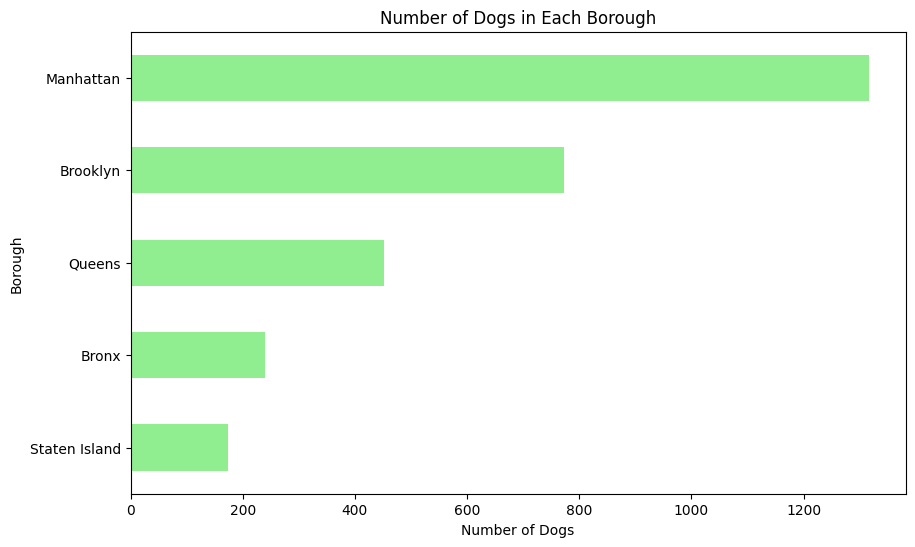

In [446]:
bcount = all_df["borough"].value_counts().sort_values(ascending = True)
bcount

# Plotting
plt.figure(figsize=(10, 6)) 
bcount.plot(kind = "barh", color = "lightgreen")
plt.title("Number of Dogs in Each Borough")
plt.xlabel("Number of Dogs")
plt.ylabel("Borough")

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [447]:
# Read the pop data
pop_df = pd.read_csv("boro_population.csv")
pop_df

# Group by borough and count number of dogs
dogspb = all_df.groupby("borough")["Animal Name"].count().reset_index()
dogspb.rename(columns={'Animal Name': 'num_dogs'}, inplace=True)
dogspb

# Merge dog data with population data based on 'borough' 
total_df = dogspb.merge(pop_df, left_on = "borough", right_on = "borough", how = "left")
total_df

,borough,num_dogs,population,area_sqmi
0,Bronx,240,1455444,42
1,Brooklyn,771,2636735,71
2,Manhattan,1316,1644518,23
3,Queens,452,2339150,109
4,Staten Island,173,474558,59


In [256]:
# Calculate dogs per capita
total_df["dogs_per_capita"] = total_df["num_dogs"]/total_df["population"]

print("Borough with the highest number of dogs per capita:")
# Find borough with highest dogs per capita
total_df.loc[total_df["dogs_per_capita"].idxmax()].reset_index()

Borough with the highest number of dogs per capita:


,index,2
0,borough,Manhattan
1,num_dogs,1316
2,population,1644518
3,area_sqmi,23
4,dogs_per_capita,0.0008


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

In [448]:
# Get boroughs in a list
brdata = all_df["borough"].unique().tolist()
brdata = brdata[0:5]
brdata

# Group by borough
brcount = all_df.groupby("borough")["Primary Breed"].value_counts()
brcount = brcount.reset_index()

In [449]:
top_breeds_br = []

# Loop through each borough and find the top 5 
for each in brdata:
    # Filter dataframe for current neighborhood
    br_df = brcount[brcount["borough"] == each]
    br_top = br_df.head(5)
    top_breeds_br.append(br_top)

top_breeds_br

[       borough       Primary Breed  count
 176  Manhattan           Chihuahua     63
 177  Manhattan  Labrador Retriever     58
 178  Manhattan   Yorkshire Terrier     56
 179  Manhattan            Shih Tzu     55
 180  Manhattan             Maltese     49,
   borough                       Primary Breed  count
 0   Bronx                   Yorkshire Terrier     25
 1   Bronx  American Pit Bull Terrier/Pit Bull     18
 2   Bronx                            Shih Tzu     18
 3   Bronx                           Chihuahua     15
 4   Bronx                             Maltese     12,
      borough                         Primary Breed  count
 59  Brooklyn                     Yorkshire Terrier     49
 60  Brooklyn                             Chihuahua     43
 61  Brooklyn  American Pit Bull Mix / Pit Bull Mix     33
 62  Brooklyn                              Shih Tzu     31
 63  Brooklyn                    Labrador Retriever     28,
            borough                         Primary Breed  co

In [450]:
ans_data = pd.concat(top_breeds_br, ignore_index=True)
ans_data

,borough,Primary Breed,count
0,Manhattan,Chihuahua,63
1,Manhattan,Labrador Retriever,58
2,Manhattan,Yorkshire Terrier,56
3,Manhattan,Shih Tzu,55
4,Manhattan,Maltese,49
5,Bronx,Yorkshire Terrier,25
6,Bronx,American Pit Bull Terrier/Pit Bull,18
7,Bronx,Shih Tzu,18
8,Bronx,Chihuahua,15
9,Bronx,Maltese,12


Text(0, 0.5, 'No. of dogs')

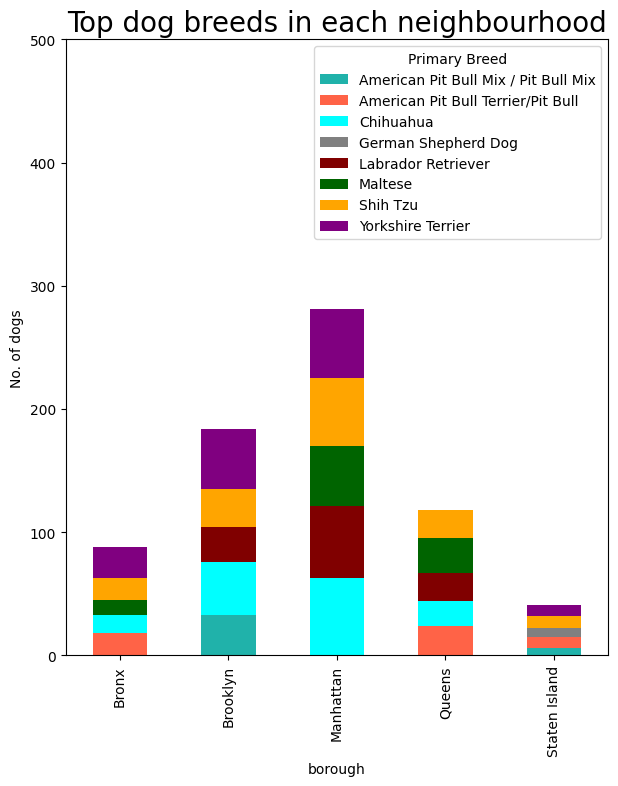

In [451]:
pivot = pd.pivot_table(data = ans_data, index=['borough'], columns=['Primary Breed'], values='count')
ax = pivot.plot.bar(stacked = True, color = ['lightseagreen', 
                                             'tomato', 
                                             'cyan',
                                             'grey', 
                                             'maroon',
                                            'darkgreen',
                                            'orange',
                                            'purple'], figsize = (7,8))
ax.set_title("Top dog breeds in each neighbourhood", fontsize=20)
ax.set_ylim(0,500)
plt.ylabel("No. of dogs")

### ENDS!🐶🐶🐶